In [1]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20251003_2012.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index
0,0,11.083004,9.998972,NaN,6.772636,4557.468056,0.000100,0
1,5,9.087700,NaN,NaN,2.206414,144331.656038,0.000100,0
2,10,8.739529,NaN,NaN,1.721128,145053.232823,0.000100,0
3,15,8.380171,NaN,NaN,1.225814,146779.407871,0.000100,0
4,20,8.119364,NaN,NaN,0.999294,146306.440526,0.000100,0
...,...,...,...,...,...,...,...,...
36250,181250,1.884599,NaN,NaN,3.743029,143427.630767,0.000072,59
36251,181255,1.714147,NaN,NaN,3.613823,143691.547469,0.000072,59
36252,181260,2.006130,NaN,NaN,3.696509,144320.592273,0.000072,59
36253,181265,1.756065,NaN,NaN,3.758042,143788.510298,0.000072,59


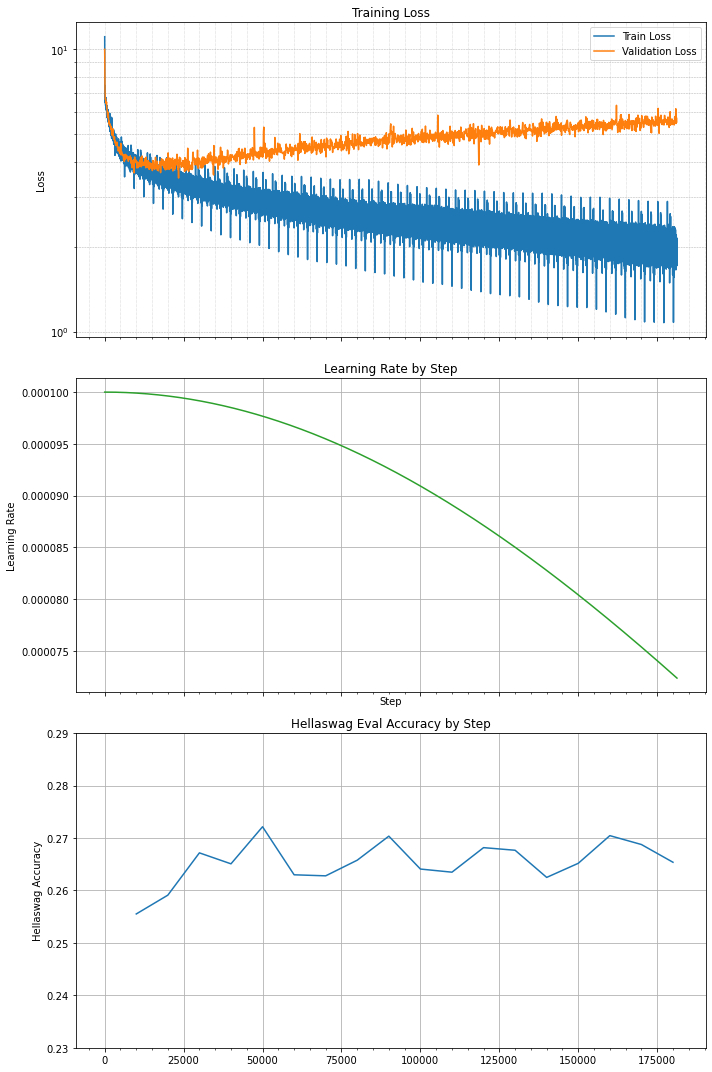

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['train_loss_smooth'] = df_metrics['train_loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
ax1.plot(df_metrics['step'], df_metrics['train_loss'], color='tab:blue', label='Train Loss')
# Only plot val_loss where it's not NaN
ax1.plot(df_metrics['step'][df_metrics['val_loss'].notna()], 
            df_metrics['val_loss'][df_metrics['val_loss'].notna()], 
            color='tab:orange', label='Validation Loss', zorder=4)
# ax1.plot(df_metrics['step'], df_metrics['train_loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax1.set_yscale('log')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot Learning Rate
ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)

# Plot Hellaswag eval metric
# df_hellaswag = 

ax3.plot(df_metrics['step'][df_metrics['hellaswag_acc'].notna()], df_metrics['hellaswag_acc'][df_metrics['hellaswag_acc'].notna()], color='tab:blue',)
ax3.set_ylabel('Hellaswag Accuracy')
ax3.set_title('Hellaswag Eval Accuracy by Step')
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.29)

plt.tight_layout()
plt.show()


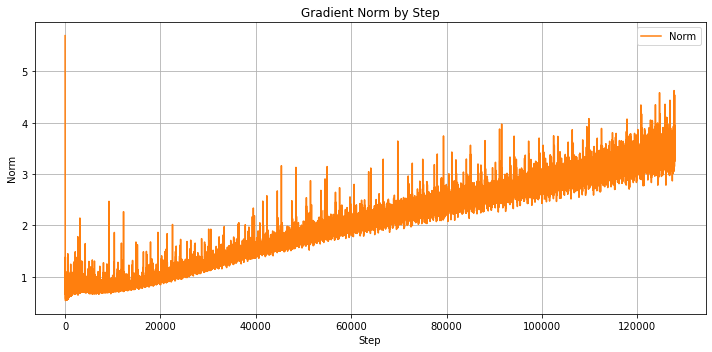

In [22]:
# Plot Norm
fig_norm, ax_norm = plt.subplots(figsize=(10, 5))
ax_norm.plot(df_metrics['step'], df_metrics['norm'], color='tab:orange', label='Norm')
ax_norm.set_xlabel('Step')
ax_norm.set_ylabel('Norm')
ax_norm.set_title('Gradient Norm by Step')
ax_norm.grid(True)
ax_norm.legend()
plt.tight_layout()
plt.show()
